In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def tensor_to_image(data: torch.Tensor):
    img = plt.imshow(data.numpy())
    img.set_cmap('gray')
    plt.axis('on')
    plt.xticks([])
    plt.yticks([])  


In [2]:
def conv2d(X, K):
    """Compute 2D cross-correlation."""
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i + h, j:j + w] * K).sum()
    return Y

     0    1
0  1.0 -1.0
1  1.0 -1.0
 shape -> torch.Size([2, 2])


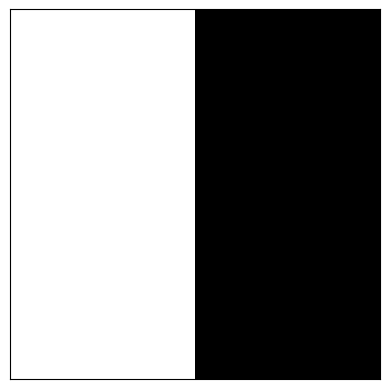

In [3]:
kernel = torch.tensor([[1.0, -1.0], [1.0, -1.0]])
tensor_to_image(kernel)
print(pd.DataFrame(kernel.numpy()))
print(f" shape -> {kernel.shape}")

 shape -> torch.Size([300, 400])


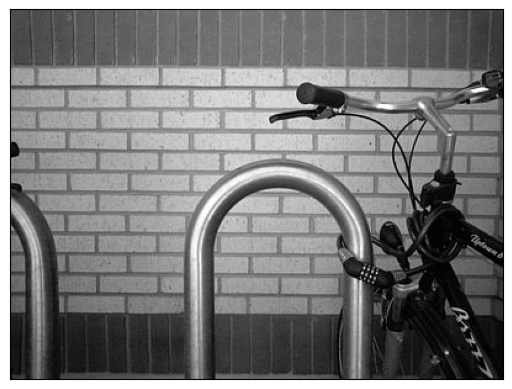

In [4]:
import urllib.request
from PIL import Image

urllib.request.urlretrieve(
  'https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Bikesgray.jpg/400px-Bikesgray.jpg',
   "bike.jpg")

im = np.array(Image.open('bike.jpg').convert('L'))
im_tens = torch.Tensor(im)
tensor_to_image(im_tens)
print(f" shape -> {im_tens.shape}")


### We take our vertical kernel and convolve it through the image.

shape -> torch.Size([299, 399])


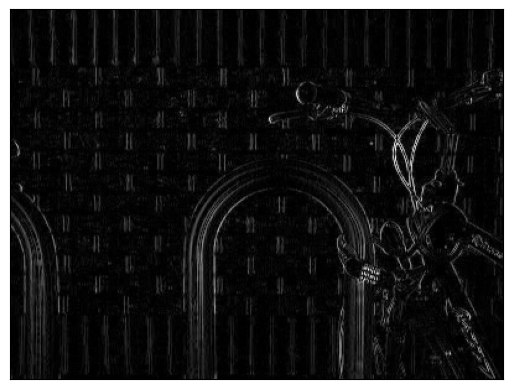

In [5]:
vertical_res = conv2d(im_tens, kernel)
tensor_to_image(vertical_res.abs())
print(f"shape -> {vertical_res.shape}")

### We take the horizontal kernel and convolve it over the image

shape -> torch.Size([299, 399])


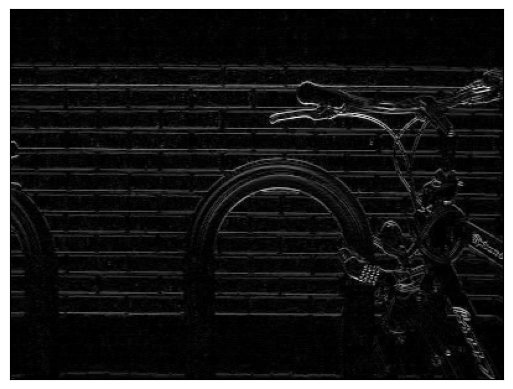

In [6]:
horizontal_res = conv2d(im_tens, kernel.t())
print(f"shape -> {horizontal_res.shape}")
tensor_to_image(horizontal_res.abs())

### Combine the results of both filters

shape -> torch.Size([299, 399])


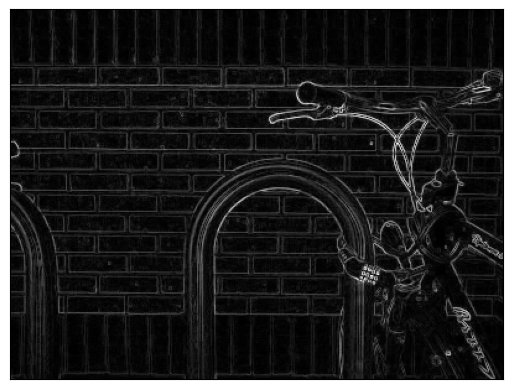

In [7]:
c = (horizontal_res.abs() + vertical_res.abs())
tensor_to_image(c)
print(f"shape -> {c.shape}")